In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [59]:
train_set=pd.read_csv('Google_Stock_Price_Train.csv')
test_set=pd.read_csv('Google_Stock_Price_Test.csv')
test_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [60]:
train_set=train_set.iloc[:,1:2].values


In [61]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [62]:
train_set=sc.fit_transform(train_set)

In [63]:
X_train=train_set[0:1257]
y_train=train_set[1:1258]

In [64]:
X_train=np.reshape(X_train,(1257,1,1))


In [65]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [66]:
regressor=Sequential()
regressor.add(LSTM(units = 4,activation='sigmoid',input_shape=(None,1)))
regressor.add(Dense(units=1))

In [67]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [68]:
regressor.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
1257/1257 [==============================] - 0s - loss: 0.1413     
Epoch 2/200
1257/1257 [==============================] - 0s - loss: 0.1075     
Epoch 3/200
1257/1257 [==============================] - 0s - loss: 0.0911     
Epoch 4/200
1257/1257 [==============================] - 0s - loss: 0.0844     
Epoch 5/200
1257/1257 [==============================] - 0s - loss: 0.0817     
Epoch 6/200
1257/1257 [==============================] - 0s - loss: 0.0802     
Epoch 7/200
1257/1257 [==============================] - 0s - loss: 0.0790     
Epoch 8/200
1257/1257 [==============================] - 0s - loss: 0.0778     
Epoch 9/200
1257/1257 [==============================] - 0s - loss: 0.0765     
Epoch 10/200
1257/1257 [==============================] - 0s - loss: 0.0753     
Epoch 11/200
1257/1257 [==============================] - 0s - loss: 0.0739     
Epoch 12/200
1257/1257 [==============================] - 0s - loss: 0.0725     
Epoch 13/200
1257/1257 [=============

1257/1257 [==============================] - 0s - loss: 2.5132e-04     
Epoch 100/200
1257/1257 [==============================] - 0s - loss: 2.5123e-04     
Epoch 101/200
1257/1257 [==============================] - 0s - loss: 2.5242e-04     
Epoch 102/200
1257/1257 [==============================] - 0s - loss: 2.5092e-04     
Epoch 103/200
1257/1257 [==============================] - 0s - loss: 2.5080e-04     
Epoch 104/200
1257/1257 [==============================] - 0s - loss: 2.5255e-04     
Epoch 105/200
1257/1257 [==============================] - 0s - loss: 2.5062e-04     
Epoch 106/200
1257/1257 [==============================] - 0s - loss: 2.5102e-04     
Epoch 107/200
1257/1257 [==============================] - 0s - loss: 2.5024e-04     
Epoch 108/200
1257/1257 [==============================] - 0s - loss: 2.5223e-04     
Epoch 109/200
1257/1257 [==============================] - 0s - loss: 2.5107e-04     
Epoch 110/200
1257/1257 [==============================] - 0s - loss

1257/1257 [==============================] - 0s - loss: 2.5397e-04     
Epoch 195/200
1257/1257 [==============================] - 0s - loss: 2.5406e-04     
Epoch 196/200
1257/1257 [==============================] - 0s - loss: 2.4984e-04     
Epoch 197/200
1257/1257 [==============================] - 0s - loss: 2.5020e-04     
Epoch 198/200
1257/1257 [==============================] - 0s - loss: 2.4878e-04     
Epoch 199/200
1257/1257 [==============================] - 0s - loss: 2.4895e-04     
Epoch 200/200
1257/1257 [==============================] - 0s - loss: 2.4843e-04     


In [69]:
real_price_set=test_set.iloc[:,1:2].values

In [70]:
inputs=real_price_set
inputs=sc.transform(inputs)
inputs=np.reshape(inputs,(20,1,1))

In [77]:
predicted_price=regressor.predict(inputs)

predicted_price=sc.inverse_transform(predicted_price)


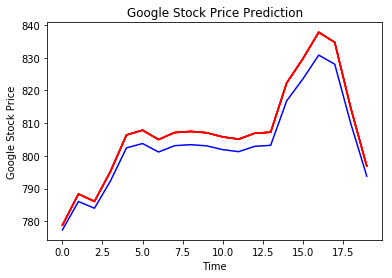

In [79]:
plt.plot(real_price_set,color='red',label='Real Price')
plt.plot(predicted_price,color='blue',label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.show()

In [83]:
import math
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(real_price_set,predicted_price))
(rmse/800)*100


0.5380687710962909